<a href="https://colab.research.google.com/github/imanollew/evaluador_postura_detectron2/blob/main/prueba_postura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [2]:
!pip install pyyaml==5.1
import math
import numpy as np
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html    esta version tiraba error, se reemplaza con la linea de abajo
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
torch:  2.0 ; cuda:  cu118
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ees3_d5t
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ees3_d5t
  Resolved https://github.com/facebookresearch/detectron2.git to commit 98849a4c269c8bb447212bfaa043762c9133e777
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
#predictor = DefaultPredictor(cfg)
#outputs = predictor(im)

In [5]:
def EstaDePerfil(shoulderR_x,shoulderR_y,shoulderL_x,shoulderL_y):

  distance=math.sqrt(pow(shoulderR_x-shoulderL_x,2)+pow(shoulderR_y-shoulderL_y,2))
  print(distance)
  #se hardcodea hasta tener una forma matematica apropiada para determinar si la persona esta o no de perfil
  #1=perfil
  #0=frente
  if distance > 20:
    return 0
  else:
    return 1

In [6]:
def GetAngle(p1x,p2x,p3x,p1y,p2y,p3y):
  a = np.array([p1x,p1y])
  b = np.array([p2x,p2y])
  c = np.array([p3x,p3y])



  ba = a - b
  bc = c - b



  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))

  angle = np.arccos(cosine_angle)
  angulo_real=np.degrees(angle)
  return angulo_real

In [7]:


def EvaluarPiernasFrente():
  if 1:
    return 1
  else:
    return 0

def EvaluarCodosFrente():
  if 1:
    return 1
  else:
    return 0

def EvaluarTorsoFrente():
  if 1:
    return 1
  else:
    return 0


def EvaluarNucaFrente():
  if 1:
    return 1
  else:
    return 0





def EvaluarPiernasPerfilV2(person_keypoint):
  try:
    angulo_r=GetAngle(
        person_keypoint['right_ankle']['x'],
        person_keypoint['right_knee']['x'],
        person_keypoint['right_hip']['x'],
        person_keypoint['right_ankle']['y'],
        person_keypoint['right_knee']['y'],
        person_keypoint['right_hip']['y'])
  except:
    angulo_r=-1
  try:
    angulo_l=GetAngle(
        person_keypoint['left_ankle']['x'],
        person_keypoint['left_knee']['x'],
        person_keypoint['left_hip']['x'],
        person_keypoint['left_ankle']['y'],
        person_keypoint['left_knee']['y'],
        person_keypoint['left_hip']['y'])
  except:
    angulo_l=-1

  if angulo_l==-1:
    dic_leg_l={'score':-1}
  else:
    if(angulo_l>= 85 and angulo_l<= 105):
      dic_leg_l={'score':1,'angulo_l':angulo_l}
    else:
      dic_leg_l={'score':0,'angulo_l':angulo_l}

  if angulo_r==-1:
    dic_leg_r={'score':-1}
  else:
    if(angulo_r>= 85 and angulo_r<= 105):
      dic_leg_r={'score':1,'angulo_r':angulo_r}
    else:
      dic_leg_r={'score':0,'angulo_r':angulo_r}
  dic_leg={}
  dic_leg['right']=dic_leg_r
  dic_leg['left']=dic_leg_l
  return dic_leg

def EvaluarCodosPerfilV2(person_keypoint):
  try:
    angulo_r=GetAngle(
      person_keypoint["right_wrist"]['x'],
      person_keypoint["right_elbow"]['x'],
      person_keypoint["right_shoulder"]['x'],
      person_keypoint["right_wrist"]["y"],
      person_keypoint["right_elbow"]["y"],
      person_keypoint["right_shoulder"]["y"])
  except:
    angulo_r=-1
  try:
    angulo_l=GetAngle(
      person_keypoint["left_wrist"]['x'],
      person_keypoint["left_elbow"]['x'],
      person_keypoint["left_shoulder"]['x'],
      person_keypoint["left_wrist"]["y"],
      person_keypoint["left_elbow"]["y"],
      person_keypoint["left_shoulder"]["y"])
  except:
    angulo_l=-1

  if angulo_l==-1:
    dic_elbow_l={'score':-1}
  else:
    if(angulo_l>= 85 and angulo_l<= 140):
      dic_elbow_l={'score':1,'angulo_l':angulo_l}
    else:
      dic_elbow_l={'score':0,'angulo_l':angulo_l}

  if angulo_r==-1:
    dic_elbow_r={'score':-1}
  else:
    if(angulo_r>= 85 and angulo_r<= 140):
      dic_elbow_r={'score':1,'angulo_r':angulo_r}
    else:
      dic_elbow_r={'score':0,'angulo_r':angulo_r}
  dic_elbow={}
  dic_elbow['right']=dic_elbow_r
  dic_elbow['left']=dic_elbow_l
  return dic_elbow

def EvaluarTorsoPerfilV2(person_keypoint):
  try:
    angulo_r=GetAngle(
      person_keypoint['right_knee']['x'],
      person_keypoint['right_hip']['x'],
      person_keypoint['right_shoulder']['x'],
      person_keypoint['right_knee']['y'],
      person_keypoint['right_hip']['y'],
      person_keypoint['right_shoulder']['y'])
  except:
    angulo_r=-1
  try:
    angulo_l=GetAngle(
      person_keypoint['left_knee']['x'],
      person_keypoint['left_hip']['x'],
      person_keypoint['left_shoulder']['x'],
      person_keypoint['left_knee']['y'],
      person_keypoint['left_hip']['y'],
      person_keypoint['left_shoulder']['y'])
  except:
    angulo_l=-1

  if angulo_l==-1:
    dic_torso_l={'score':-1}
  else:
    if(angulo_l>= 85 and angulo_l<= 105):
      dic_torso_l={'score':1,'angulo_l':angulo_l}
    else:
      dic_torso_l={'score':0,'angulo_l':angulo_l}

  if angulo_r==-1:
    dic_torso_r={'score':-1}
  else:
    if(angulo_r>= 85 and angulo_r<= 105):
      dic_torso_r={'score':1,'angulo_r':angulo_r}
    else:
      dic_torso_r={'score':0,'angulo_r':angulo_r}
  dic_torso={}
  dic_torso['right']=dic_torso_r
  dic_torso['left']=dic_torso_l
  return dic_torso


def EvaluarNeckPerfilV2(person_keypoint):
  try:
    angulo_r=GetAngle(
      person_keypoint['right_hip']['x'],
      person_keypoint['right_shoulder']['x'],
      person_keypoint['right_ear']['x'],
      person_keypoint['right_hip']['y'],
      person_keypoint['right_shoulder']['y'],
      person_keypoint['right_ear']['y'])
  except:
    angulo_r=-1
  try:
    angulo_l=GetAngle(
      person_keypoint['left_hip']['x'],
      person_keypoint['left_shoulder']['x'],
      person_keypoint['left_ear']['x'],
      person_keypoint['left_hip']['y'],
      person_keypoint['left_shoulder']['y'],
      person_keypoint['left_ear']['y'])
  except:
    angulo_l=-1

  if angulo_l==-1:
    dic_neck_l={'score':-1}
  else:
    if(angulo_l>= 150 and angulo_l<= 170):
      dic_neck_l={'score':1,'angulo_l':angulo_l}
    else:
      dic_neck_l={'score':0,'angulo_l':angulo_l}

  if angulo_r==-1:
    dic_neck_r={'score':-1}
  else:
    if(angulo_r>= 150 and angulo_r<= 170):
      dic_neck_r={'score':1,'angulo_r':angulo_r}
    else:
      dic_neck_r={'score':0,'angulo_r':angulo_r}
  dic_neck={}
  dic_neck['right']=dic_neck_r
  dic_neck['left']=dic_neck_l
  return dic_neck


def EstaBienSentadoV2(perfil,person_keypoint):
  if perfil==1:
    score_piernas=EvaluarPiernasPerfilV2(person_keypoint) #cercano a 90º
    score_codos=EvaluarCodosPerfilV2(person_keypoint)
    score_torso=EvaluarTorsoPerfilV2(person_keypoint)
    score_nuca=EvaluarNeckPerfilV2(person_keypoint)
    dic={"piernas":score_piernas,"codos":score_codos, "torso":score_torso, "nuca":score_nuca}
    print(dic)
    #,"codos":score_codos, "torso":score_torso, "nuca":score_nuca



In [8]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

[09/13 19:27:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl ...


model_final_a6e10b.pkl: 237MB [00:01, 141MB/s]                           


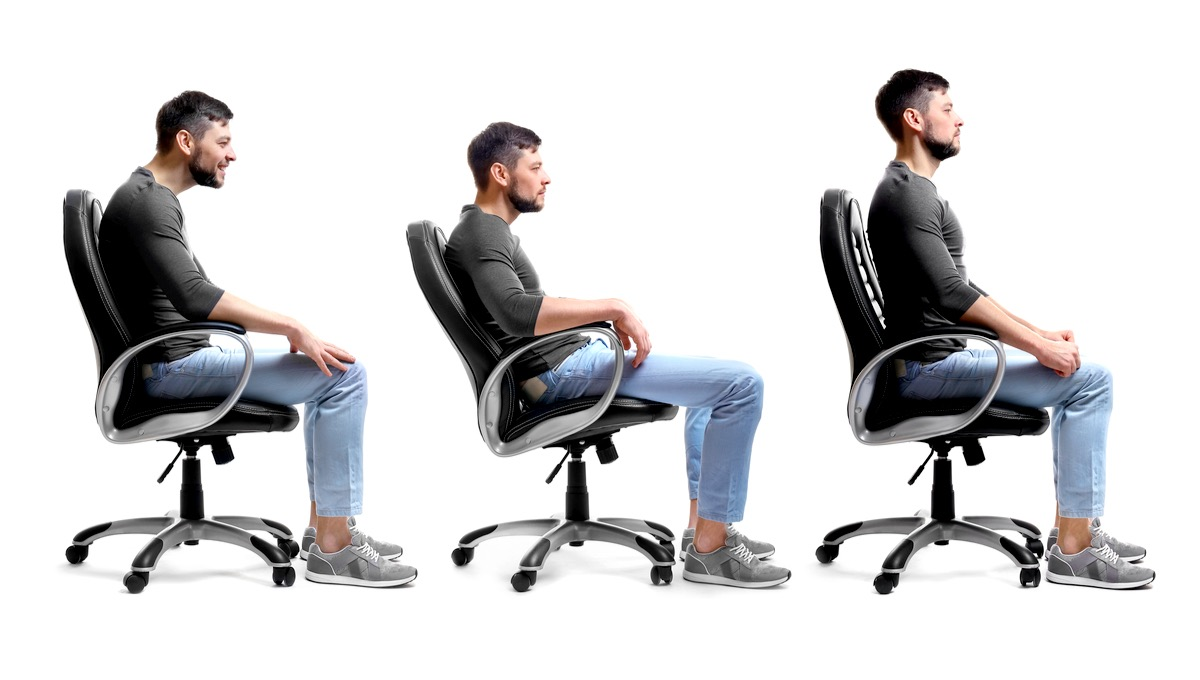

In [9]:
im = cv2.imread("/content/img_ej9.jpg")
#im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) #siempre comentado a menos que sea necesario
cv2_imshow(im)

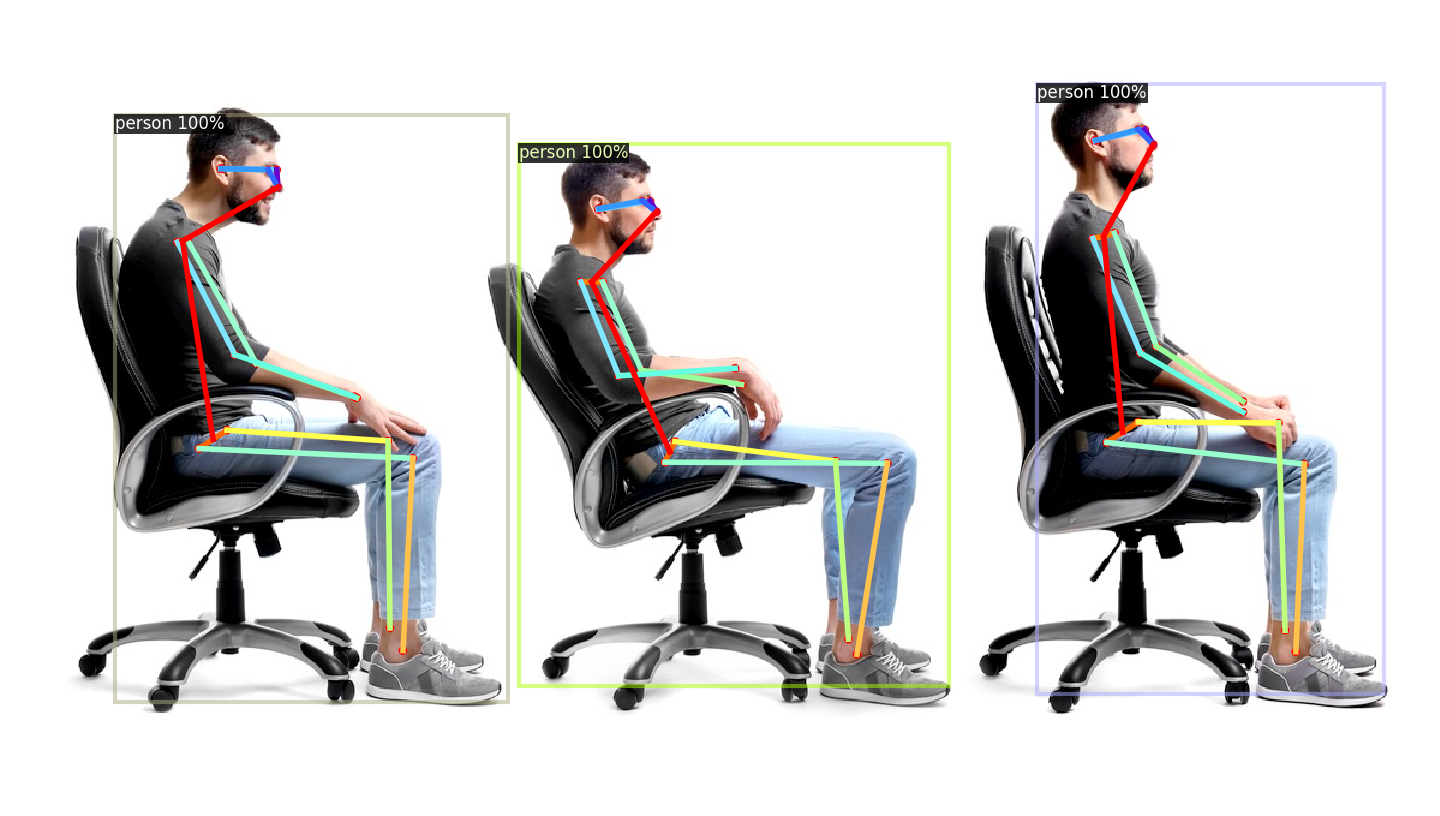

{'nose': {'x': 547.0588, 'y': 176.44905, 'conf': 4.3110685}, 'left_eye': {'x': 541.66705, 'y': 167.45438, 'conf': 1.915636}, 'right_eye': {'x': 535.3767, 'y': 167.45438, 'conf': 3.0932481}, 'left_ear': {'x': 498.53308, 'y': 174.65012, 'conf': 0.8996575}, 'right_ear': {'x': 499.4317, 'y': 173.75064, 'conf': 0.9870623}, 'left_shoulder': {'x': 502.12756, 'y': 234.91441, 'conf': 0.19983648}, 'right_shoulder': {'x': 484.1551, 'y': 234.91441, 'conf': 0.34491453}, 'left_elbow': {'x': 534.4781, 'y': 308.67075, 'conf': 0.11207592}, 'right_elbow': {'x': 515.607, 'y': 313.1681, 'conf': 0.91317964}, 'left_wrist': {'x': 618.05023, 'y': 320.3638, 'conf': 0.06590305}, 'right_wrist': {'x': 612.65845, 'y': 306.8718, 'conf': 0.9385942}, 'left_hip': {'x': 562.3355, 'y': 368.03558, 'conf': 0.07871228}, 'right_hip': {'x': 554.24786, 'y': 385.12546, 'conf': 0.14869867}, 'left_knee': {'x': 696.2306, 'y': 384.22595, 'conf': 0.10204202}, 'right_knee': {'x': 739.3646, 'y': 386.0249, 'conf': 0.5691807}, 'left_an

In [11]:
'''# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)'''
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


#outputs2 = predictor(im2)
#v2 = Visualizer(im2[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
#out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
#cv2_imshow(out2.get_image()[:, :, ::-1])
#print(outputs2)
#print(outputs2["instances"].pred_keypoints)
lista=[]
person_keypoint2 = dict()


for det_keypoints in outputs["instances"].pred_keypoints:
  person_keypoint={"nose":{'x':(det_keypoints.cpu().numpy()[0][0]),'y': (det_keypoints.cpu().numpy()[0][1]), 'conf': (det_keypoints.cpu().numpy()[0][2])},"left_eye":{'x':(det_keypoints.cpu().numpy()[1][0]),'y': (det_keypoints.cpu().numpy()[1][1]), 'conf': (det_keypoints.cpu().numpy()[1][2])},"right_eye":{'x':(det_keypoints.cpu().numpy()[2][0]),'y': (det_keypoints.cpu().numpy()[2][1]), 'conf': (det_keypoints.cpu().numpy()[2][2])},"left_ear":{'x':(det_keypoints.cpu().numpy()[3][0]),'y': (det_keypoints.cpu().numpy()[3][1]), 'conf': (det_keypoints.cpu().numpy()[3][2])},"right_ear":{'x':(det_keypoints.cpu().numpy()[4][0]),'y': (det_keypoints.cpu().numpy()[4][1]), 'conf': (det_keypoints.cpu().numpy()[4][2])},"left_shoulder":{'x':(det_keypoints.cpu().numpy()[5][0]),'y': (det_keypoints.cpu().numpy()[5][1]), 'conf': (det_keypoints.cpu().numpy()[5][2])},"right_shoulder":{'x':(det_keypoints.cpu().numpy()[6][0]),'y': (det_keypoints.cpu().numpy()[6][1]), 'conf': (det_keypoints.cpu().numpy()[6][2])},"left_elbow":{'x':(det_keypoints.cpu().numpy()[7][0]),'y': (det_keypoints.cpu().numpy()[7][1]), 'conf': (det_keypoints.cpu().numpy()[7][2])},"right_elbow":{'x':(det_keypoints.cpu().numpy()[8][0]),'y': (det_keypoints.cpu().numpy()[8][1]), 'conf': (det_keypoints.cpu().numpy()[8][2])},"left_wrist":{'x':(det_keypoints.cpu().numpy()[9][0]),'y': (det_keypoints.cpu().numpy()[9][1]), 'conf': (det_keypoints.cpu().numpy()[9][2])},"right_wrist":{'x':(det_keypoints.cpu().numpy()[10][0]),'y': (det_keypoints.cpu().numpy()[10][1]), 'conf': (det_keypoints.cpu().numpy()[10][2])},"left_hip":{'x':(det_keypoints.cpu().numpy()[11][0]),'y': (det_keypoints.cpu().numpy()[11][1]), 'conf': (det_keypoints.cpu().numpy()[11][2])},"right_hip":{'x':(det_keypoints.cpu().numpy()[12][0]),'y': (det_keypoints.cpu().numpy()[12][1]), 'conf': (det_keypoints.cpu().numpy()[12][2])},"left_knee":{'x':(det_keypoints.cpu().numpy()[13][0]),'y': (det_keypoints.cpu().numpy()[13][1]), 'conf': (det_keypoints.cpu().numpy()[13][2])},"right_knee":{'x':(det_keypoints.cpu().numpy()[14][0]),'y': (det_keypoints.cpu().numpy()[14][1]), 'conf': (det_keypoints.cpu().numpy()[14][2])},"left_ankle":{'x':(det_keypoints.cpu().numpy()[15][0]),'y': (det_keypoints.cpu().numpy()[15][1]), 'conf': (det_keypoints.cpu().numpy()[15][2])},"right_ankle":{'x':(det_keypoints.cpu().numpy()[16][0]),'y': (det_keypoints.cpu().numpy()[16][1]), 'conf': (det_keypoints.cpu().numpy()[16][2])}}
  print(person_keypoint)
  '''
  for key in person_keypoint:
    print(key)
    print(value)

    if value['conf']>0.09:
      person_keypoint2[key] = value
    else:
      print("se elimina ",key,"por confianza baja")
  print("s")
  '''
  l=[]
  person_keypoint2=person_keypoint
  for key1 in person_keypoint2:
    for key2 in person_keypoint2[key1]:
      if person_keypoint2[key1][key2]<0.07:  #estaba en 0.09 originalmente
        l.append(key1)
  for i in l:
    person_keypoint2.pop(i)
  #print(person_keypoint2)
  lista.append(person_keypoint2)

In [ ]:
#lista

In [12]:
#1=buena postura
#0= mala postura
#-1=confianza baja
for person_keypoint in lista:
  #print(person_keypoint)
  #perfil=EstaDePerfil(person_keypoint['right_shoulder']['x'],person_keypoint['right_shoulder']['y'],person_keypoint['left_shoulder']['x'],person_keypoint['left_shoulder']['y'])
  #EstaBienSentado(1,person_keypoint)
  EstaBienSentadoV2(1,person_keypoint)

{'piernas': {'right': {'score': 0, 'angulo_r': 81.29739}, 'left': {'score': 1, 'angulo_l': 101.050415}}, 'codos': {'right': {'score': 1, 'angulo_r': 108.18439}, 'left': {'score': -1}}, 'torso': {'right': {'score': 0, 'angulo_r': 115.29349}, 'left': {'score': 0, 'angulo_l': 121.23088}}, 'nuca': {'right': {'score': 0, 'angulo_r': 140.96129}, 'left': {'score': 1, 'angulo_l': 159.0771}}}
{'piernas': {'right': {'score': 1, 'angulo_r': 93.602264}, 'left': {'score': 1, 'angulo_l': 92.23099}}, 'codos': {'right': {'score': 0, 'angulo_r': 142.61035}, 'left': {'score': 0, 'angulo_l': 142.89186}}, 'torso': {'right': {'score': 1, 'angulo_r': 100.17126}, 'left': {'score': 1, 'angulo_l': 97.60781}}, 'nuca': {'right': {'score': 0, 'angulo_r': 174.17546}, 'left': {'score': 0, 'angulo_l': 175.34254}}}
{'piernas': {'right': {'score': 1, 'angulo_r': 89.71742}, 'left': {'score': 1, 'angulo_l': 94.50735}}, 'codos': {'right': {'score': 1, 'angulo_r': 136.35413}, 'left': {'score': 1, 'angulo_l': 138.28598}}, 